<a href="https://colab.research.google.com/github/kcw0331/Environmental-Health-Big-Data-Analysis/blob/main/12%EC%A3%BC%EC%B0%A8/2-formatting_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formatting Plots

## About the Data
In this notebook, we will be working with 2 datasets:
- Facebook's stock price throughout 2018 (obtained using the [`stock_analysis` package](https://github.com/stefmolin/stock-analysis))
- European Centre for Disease Prevention and Control's (ECDC) [daily number of new reported cases of COVID-19 by country worldwide dataset](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide) collected on September 19, 2020 via [this link](https://opendata.ecdc.europa.eu/covid19/casedistribution/csv)

## Setup

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_06

/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_06


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

## Titles and Axis Labels
- `plt.suptitle()` adds a title to plots and subplots
- `plt.title()` adds a title to a single plot. Note if you use subplots, it will only put the title on the last subplot, so you will need to use `plt.suptitle()`
- `plt.xlabel()` labels the x-axis
- `plt.ylabel()` labels the y-axis

* 이러한 함수를 이용해서 Titles과 Axis를 사용할 수 있다는 것이다.
* suptitle은 서브 타이틀들이 있을때, 전체의 타이틀을 만들어주는 역할을 한다.
* title은 single plot의 각각의 타이틀을 지정해주는 역할을 한다.
* xlabel은 x축의 레이블을 지정해주는 것이다.
* ylabel은 y축의 레이블을 지정해주는 것이다.

Text(0, 0.5, 'price ($)')

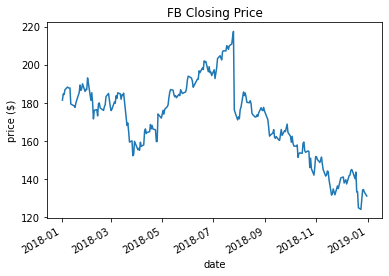

In [5]:
fb.close.plot()
plt.title('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')

### `plt.suptitle()` vs. `plt.title()`
Check out what happens when we call `plt.title()` with subplots (and also `plt.ylabel()`):

Text(0, 0.5, 'price ($)')

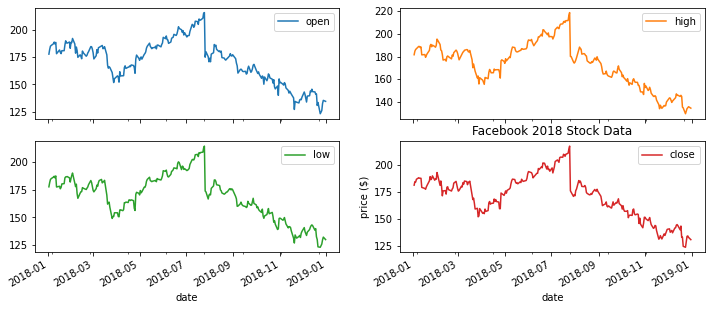

In [6]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.ylabel('price ($)')

Using `plt.suptitle()` will give the figure a title; for the y-axis labels, we need to use the `Axes` objects directly:

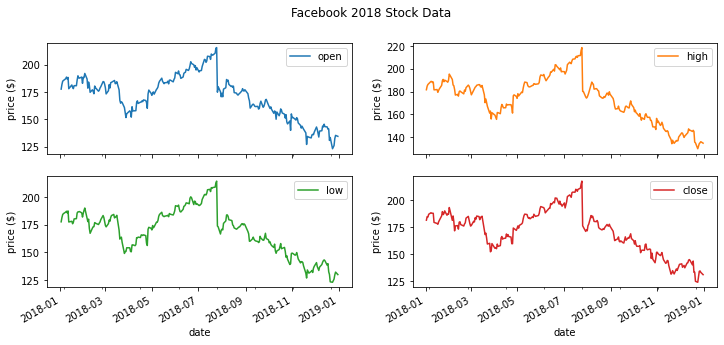

In [7]:
axes = fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data')
for ax in axes.flatten():
    ax.set_ylabel('price ($)')

* flatten을 해주면 하나의 벡터로 나타나게 된다.
* 각각의 ax를 따라서 y축의 레이블이 price ($)가 되는 것을 알 수 있다. 

## Legends
Matplotlib makes it possible to control many aspects of how the legend looks including its appearance and location. Here is a sampling of commonly used parameters, which we will see throughout the book:

| Parameter | Purpose |
| --- | --- |
| `loc` | Specify the location of the legend |
| `bbox_to_anchor` | Used in conjunction with `loc` to specify legend location |
| `ncol` | Set the number of columns the labels will be broken into, default is 1 |
| `framealpha` | Control the transparency of the legend's background |
| `title` | Give the legend a title |

`plt.legend()` adds a legend to the plot. We can specify where to place it with the `loc` parameter:

Text(0, 0.5, 'price ($)')

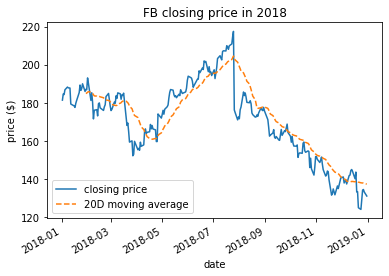

In [8]:
fb.assign(
    ma=lambda x: x.close.rolling(20).mean()
).plot(
    y=['close', 'ma'], 
    title='FB closing price in 2018',
    label=['closing price', '20D moving average'],
    style=['-', '--']
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')

* ma를 하여서 20개의 rolling average를 만들어 주었다. 
* moving average와 closing price를 만들어 주었다. 

* 아래 테이블에 나타나있는 것처럼 문자말고도 숫자를 사용해서도 location을 나타낼 수 있다. 


By default, `matplotlib` tries to find the best location for the legend, but we can override it as we see fit. Here are the available general locations, but note that you can always provide an (x, y) tuple of where to place the legend:

| Location String | Location Code |
| --- | --- |
| `'best'` | `0` |
| `'upper right'` | `1` |
| `'upper left'` | `2` |
| `'lower left'` | `3` |
| `'lower right'` | `4` |
| `'right'` | `5` |
| `'center left'` | `6` |
| `'center right'` | `7` |
| `'lower center'` | `8` |
| `'upper center'` | `9` |
| `'center'` | `10` |

Note there is also a `legend()` method on `Axes` objects. Let's use it along with the `framealpha` and `ncol` arguments to style a legend. We will take a look at the percentage of the world's new COVID-19 cases that occurred in Brazil, China, India, Italy, Spain, and the USA over the 8-month period from January 18, 2020 through September 18, 2020:

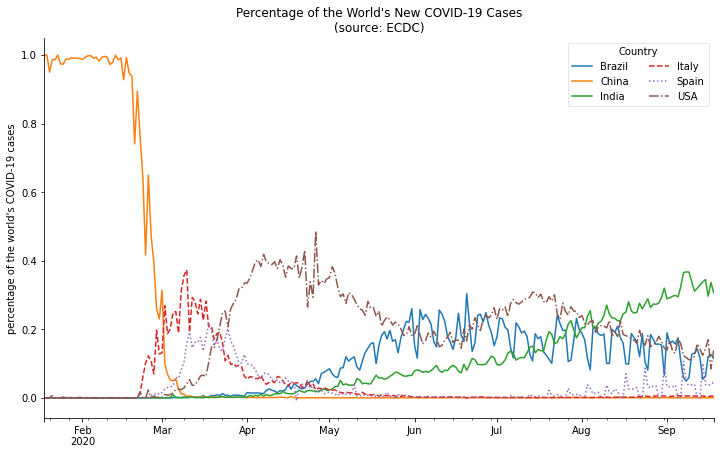

In [9]:
new_cases = covid.reset_index().pivot(
    index='date', columns='countriesAndTerritories', values='cases'
).fillna(0)

pct_new_cases = new_cases.apply(lambda x: x / new_cases.apply('sum', axis=1), axis=0)[
    ['Italy', 'China', 'Spain', 'USA', 'India', 'Brazil']
].sort_index(axis=1).fillna(0)

ax = pct_new_cases.plot(
    figsize=(12, 7), style=['-'] * 3 + ['--', ':', '-.'],
    title='Percentage of the World\'s New COVID-19 Cases\n(source: ECDC)'
)

ax.legend(title='Country', framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('percentage of the world\'s COVID-19 cases')

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

* for문을 사용해서 top, right로 해서 위에와 오른쪽의 실선이 없어진 것을 볼 수 있다.

## Formatting Axes
### Specifying axis limits
`plt.xlim()`/`plt.ylim()` and `Axes.set_xlim()`/`Axes.set_ylim()` can be used to specify the minimum and maximum values for the axis. Passing `None` will have `matplotlib` determine the limit.

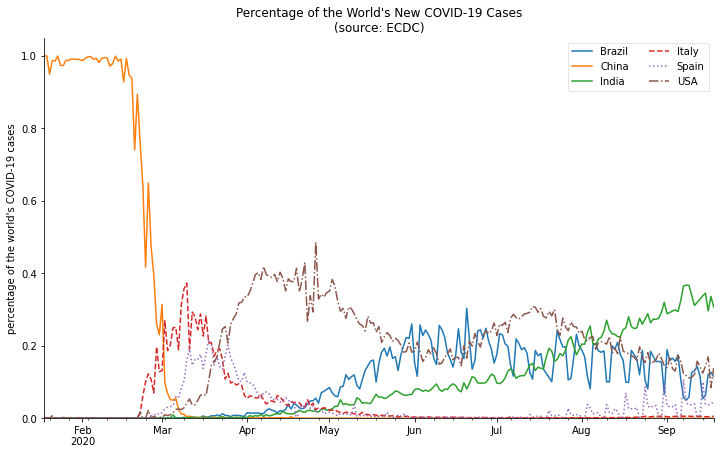

In [10]:
ax = pct_new_cases.plot(
    figsize=(12, 7), style=['-'] * 3 + ['--', ':', '-.'],
    title='Percentage of the World\'s New COVID-19 Cases\n(source: ECDC)'
)

ax.legend(framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('percentage of the world\'s COVID-19 cases')
ax.set_ylim(0, None)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

* 앞에서는 그래프가 약간 떠 있었는데, ax.set_ylim(0, None)이걸 사용해서 0에 붙여줄 수 있다. 

### Formatting the Axis Ticks
We can use `plt.xticks()` and `plt.yticks()` to provide tick labels and specify, which ticks to show. Here, we show every month on the same day of the month (the 18th):

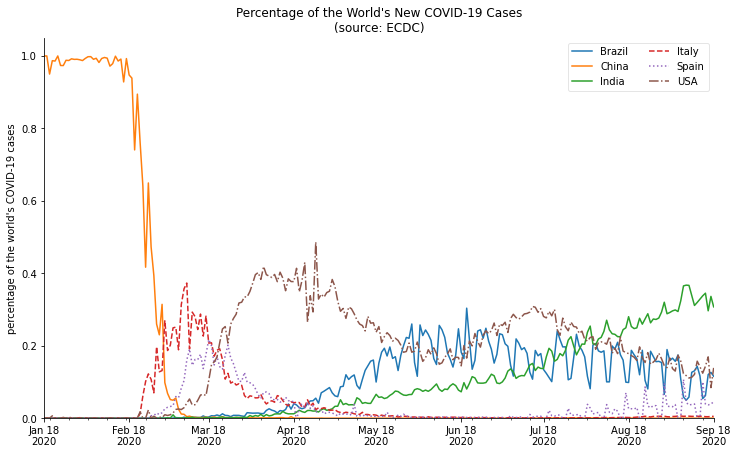

In [11]:
ax = pct_new_cases.plot(
    figsize=(12, 7), style=['-'] * 3 + ['--', ':', '-.'],
    title='Percentage of the World\'s New COVID-19 Cases\n(source: ECDC)'
)

tick_locs = covid.index[covid.index.day == 18].unique()
tick_labels = [loc.strftime('%b %d\n%Y') for loc in tick_locs]
plt.xticks(tick_locs, tick_labels)

ax.legend(framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('percentage of the world\'s COVID-19 cases')
ax.set_ylim(0, None)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

* Axis Ticks를 사용해서 시작일의 날짜가 언제인지를 알 수 있다. 

#### The `matplotlib.ticker` module
##### `PercentFormatter`
We can use the `PercentFormatter` class to display the tick labels as percentages. We can specify the denominator (`xmax`) to use when calculating the percentages. This gets passed to the `set_major_formatter()` method of the `xaxis` or `yaxis` on the `Axes`.

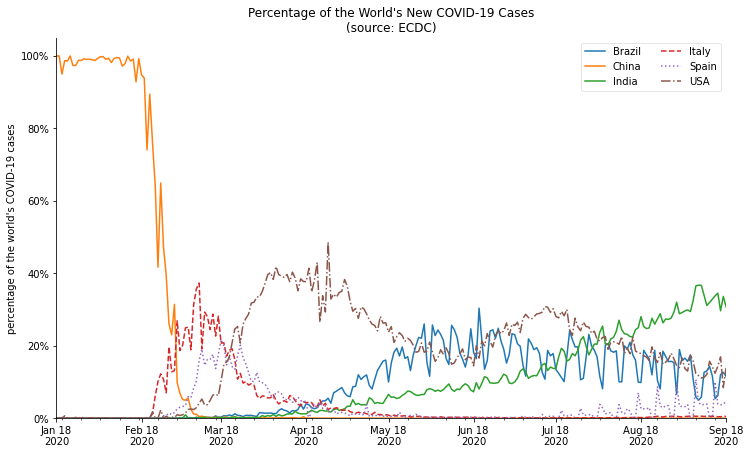

In [12]:
from matplotlib.ticker import PercentFormatter

ax = pct_new_cases.plot(
    figsize=(12, 7), style=['-'] * 3 + ['--', ':', '-.'],
    title='Percentage of the World\'s New COVID-19 Cases\n(source: ECDC)'
)

tick_locs = covid.index[covid.index.day == 18].unique()
tick_labels = [loc.strftime('%b %d\n%Y') for loc in tick_locs]
plt.xticks(tick_locs, tick_labels)

ax.legend(title='', framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('percentage of the world\'s COVID-19 cases')
ax.set_ylim(0, None)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

* PercentFormatter를 사용해서 y축을 0퍼센트에서 100퍼센트로 바꾸어 줄 수 있다.

##### `EngFormatter`
We can use the `EngFormatter` class to apply engineering notation to the ticks.

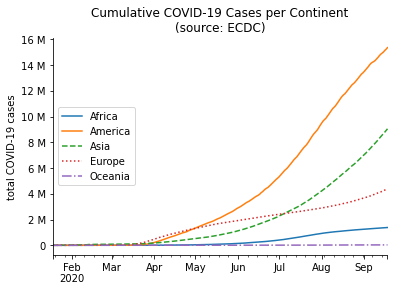

In [13]:
from matplotlib.ticker import EngFormatter

ax = covid.query('continentExp != "Other"').groupby([
    'continentExp', pd.Grouper(freq='1D')
]).cases.sum().unstack(0).apply('cumsum').plot(
    style=['-', '-', '--', ':', '-.'],
    title='Cumulative COVID-19 Cases per Continent\n(source: ECDC)'
)

ax.legend(title='', loc='center left')
ax.set(xlabel='', ylabel='total COVID-19 cases')
ax.yaxis.set_major_formatter(EngFormatter())

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

* 단위가 큰 경우에는 ax.yaxis.set_major_formatter(EngFormatter())이거를 사용해서 밀리언 단위로 나타낼 수 있다. 

##### `MultipleLocator`
If we plot the daily new COVID-19 cases in New Zealand from April 18, 2020 through September 18, 2020, by default, `matplotlib` shows the *y*-axis in increments of 2.5, but we know that it isn't possible to have fractional cases:

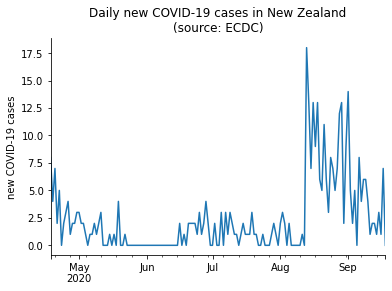

In [14]:
ax = new_cases.New_Zealand['2020-04-18':'2020-09-18'].plot(
    title='Daily new COVID-19 cases in New Zealand\n(source: ECDC)'
)
ax.set(xlabel='', ylabel='new COVID-19 cases')

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

* y축에 소수점으로 찍혀서 보기 않좋을 때, 아래와 같이 정수로 나타내서 표시해 줄 수 있다. 

To make sure we only show integer values, we can use the `MultipleLocator` class. This will give ticks for all multiples of a number specified with the `base` parameter:

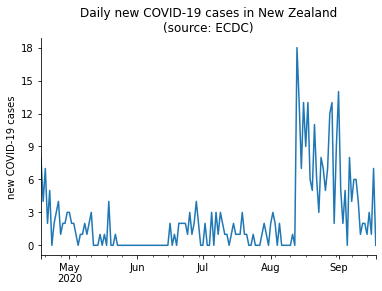

In [15]:
from matplotlib.ticker import MultipleLocator

ax = new_cases.New_Zealand['2020-04-18':'2020-09-18'].plot(
    title='Daily new COVID-19 cases in New Zealand\n(source: ECDC)'
)
ax.set(xlabel='', ylabel='new COVID-19 cases')
ax.yaxis.set_major_locator(MultipleLocator(base=3))

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

* MultipleLocator(base=3)해서 3씩증가하게 할 수 있다.

<hr>
<div>
    <a href="./1-introduction_to_seaborn.ipynb">
        <button>&#8592; Previous Notebook</button>
    </a>
    <a href="./3-customizing_visualizations.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<hr>